## Import necessary modules

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk.probability import FreqDist
from utils import DatasetReader

nltk.download('stopwords')

sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/citadel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the data and initial analysis

In [3]:
reader = DatasetReader()
data = reader.read('../data/csv/clean_data.csv', '../data/parsing/save_my_exams_data.csv')
data

,Questions,Topic
0,define the term brand,marketing_mix_and_strategy
1,explain one risk jack ma may have taken when s...,entreprenuers_and_leaders
2,analyse two factors that may have increased de...,market
3,discuss if profit maximisation is the main bus...,entreprenuers_and_leaders
4,assess the advantages of a paternalistic style...,managing_people
...,...,...
492,what is meant by the term emotional intelligence?,entreprenuers_and_leaders
493,true or false? entrepreneurs are often driven ...,entreprenuers_and_leaders
494,what is meant by the term figurehead?,entreprenuers_and_leaders
495,true or false? many entrepreneurs are driven m...,entreprenuers_and_leaders


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  497 non-null    object
 1   Topic      497 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

Questions    0
Topic        0
dtype: int64

## Exoloratory Data Analysis of all data

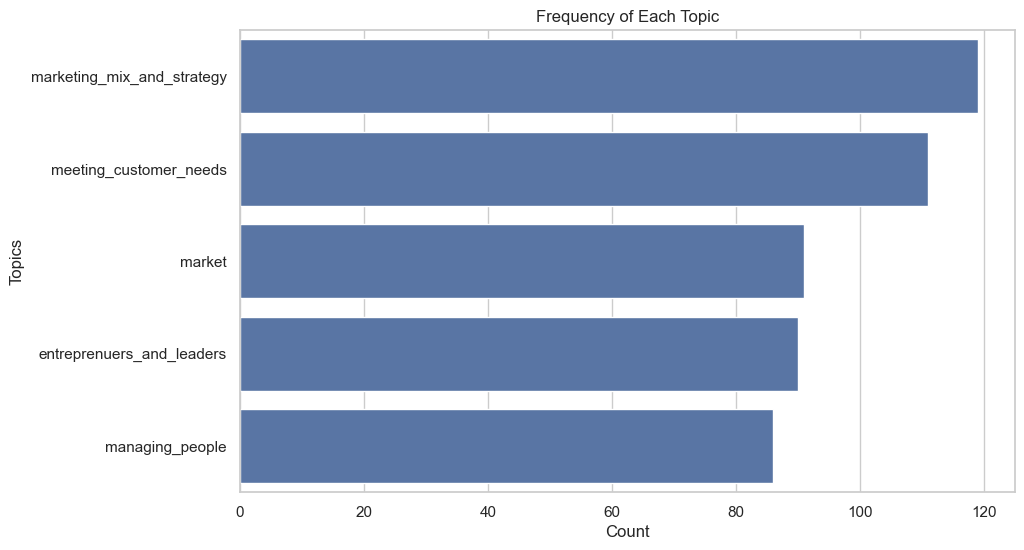

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=data, order=data['Topic'].value_counts().index)
plt.title('Frequency of Each Topic')
plt.xlabel('Count')
plt.ylabel('Topics')
plt.show()

As we can observe above, the dataset is somewhat balanced, but we still have to take into account the absence of uniform distribution along the Topic column, when working with our models in the future.

In [7]:
import re
from nltk.tokenize import word_tokenize

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['Cleaned_Questions'] = data['Questions'].apply(clean_text)

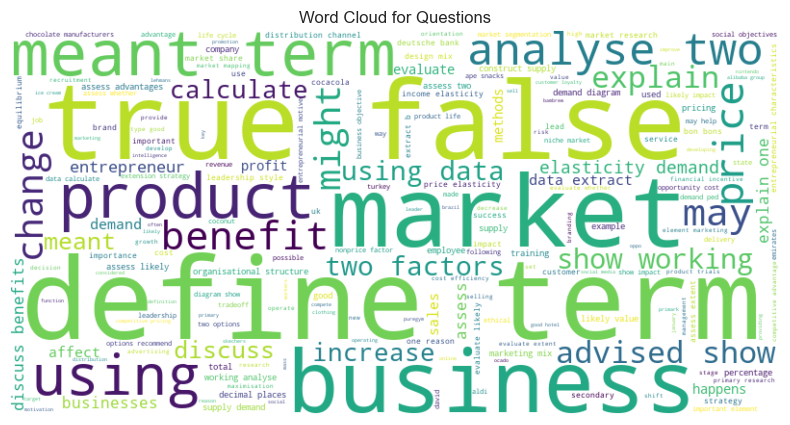

In [8]:
all_words = ' '.join(data['Cleaned_Questions'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Questions')
plt.show()

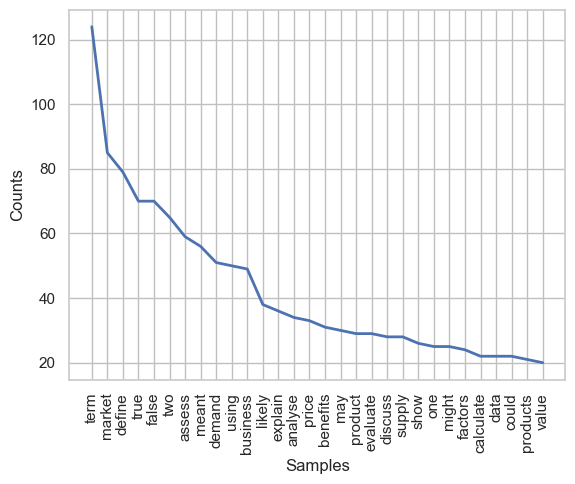

In [9]:
from nltk.probability import FreqDist

words = [word for text in data['Cleaned_Questions'] for word in text.split()]

fdist = FreqDist(words)
fdist.plot(30, cumulative=False)
plt.show()

## Exploratory Data Analysis by Topic

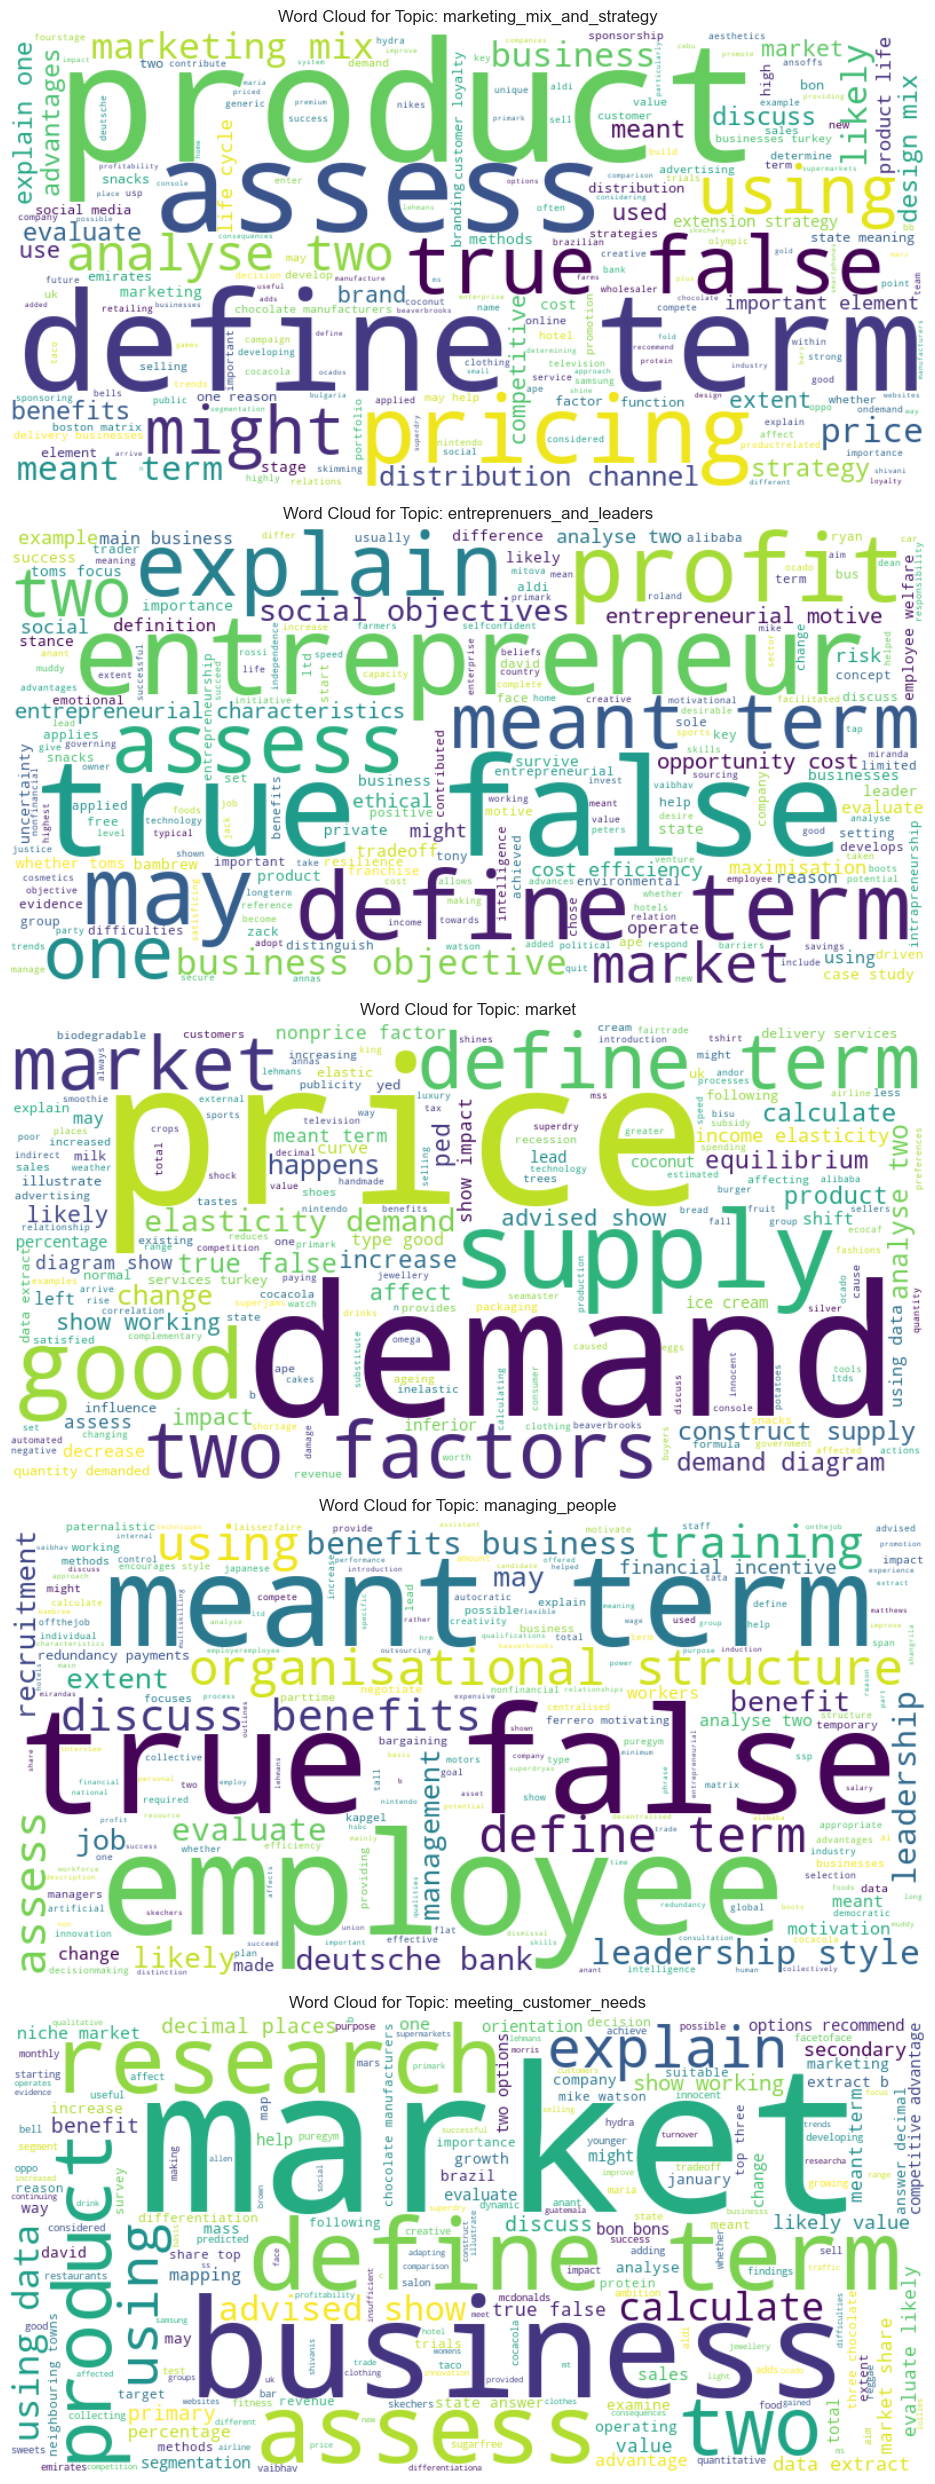

In [17]:
unique_topics = data['Topic'].unique()

fig, axes = plt.subplots(nrows=len(unique_topics), ncols=1, figsize=(10, 5 * len(unique_topics)))

for i, topic in enumerate(unique_topics):
    topic_data = data[data['Topic'] == topic]

    topic_words = ' '.join(topic_data['Cleaned_Questions'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_words)
    
    if len(unique_topics) > 1:
        ax = axes[i]
    else:
        ax = axes
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for Topic: {topic}')

plt.tight_layout()
plt.show()

It is clear from above, that each topic has its own set of mostly used words, which will be crucial for our ML models in the future. For example, for "Meeting customer needs", the most popular words are "market" and "business", whereas for "Market" topic, the most used words are "market" and "business". 

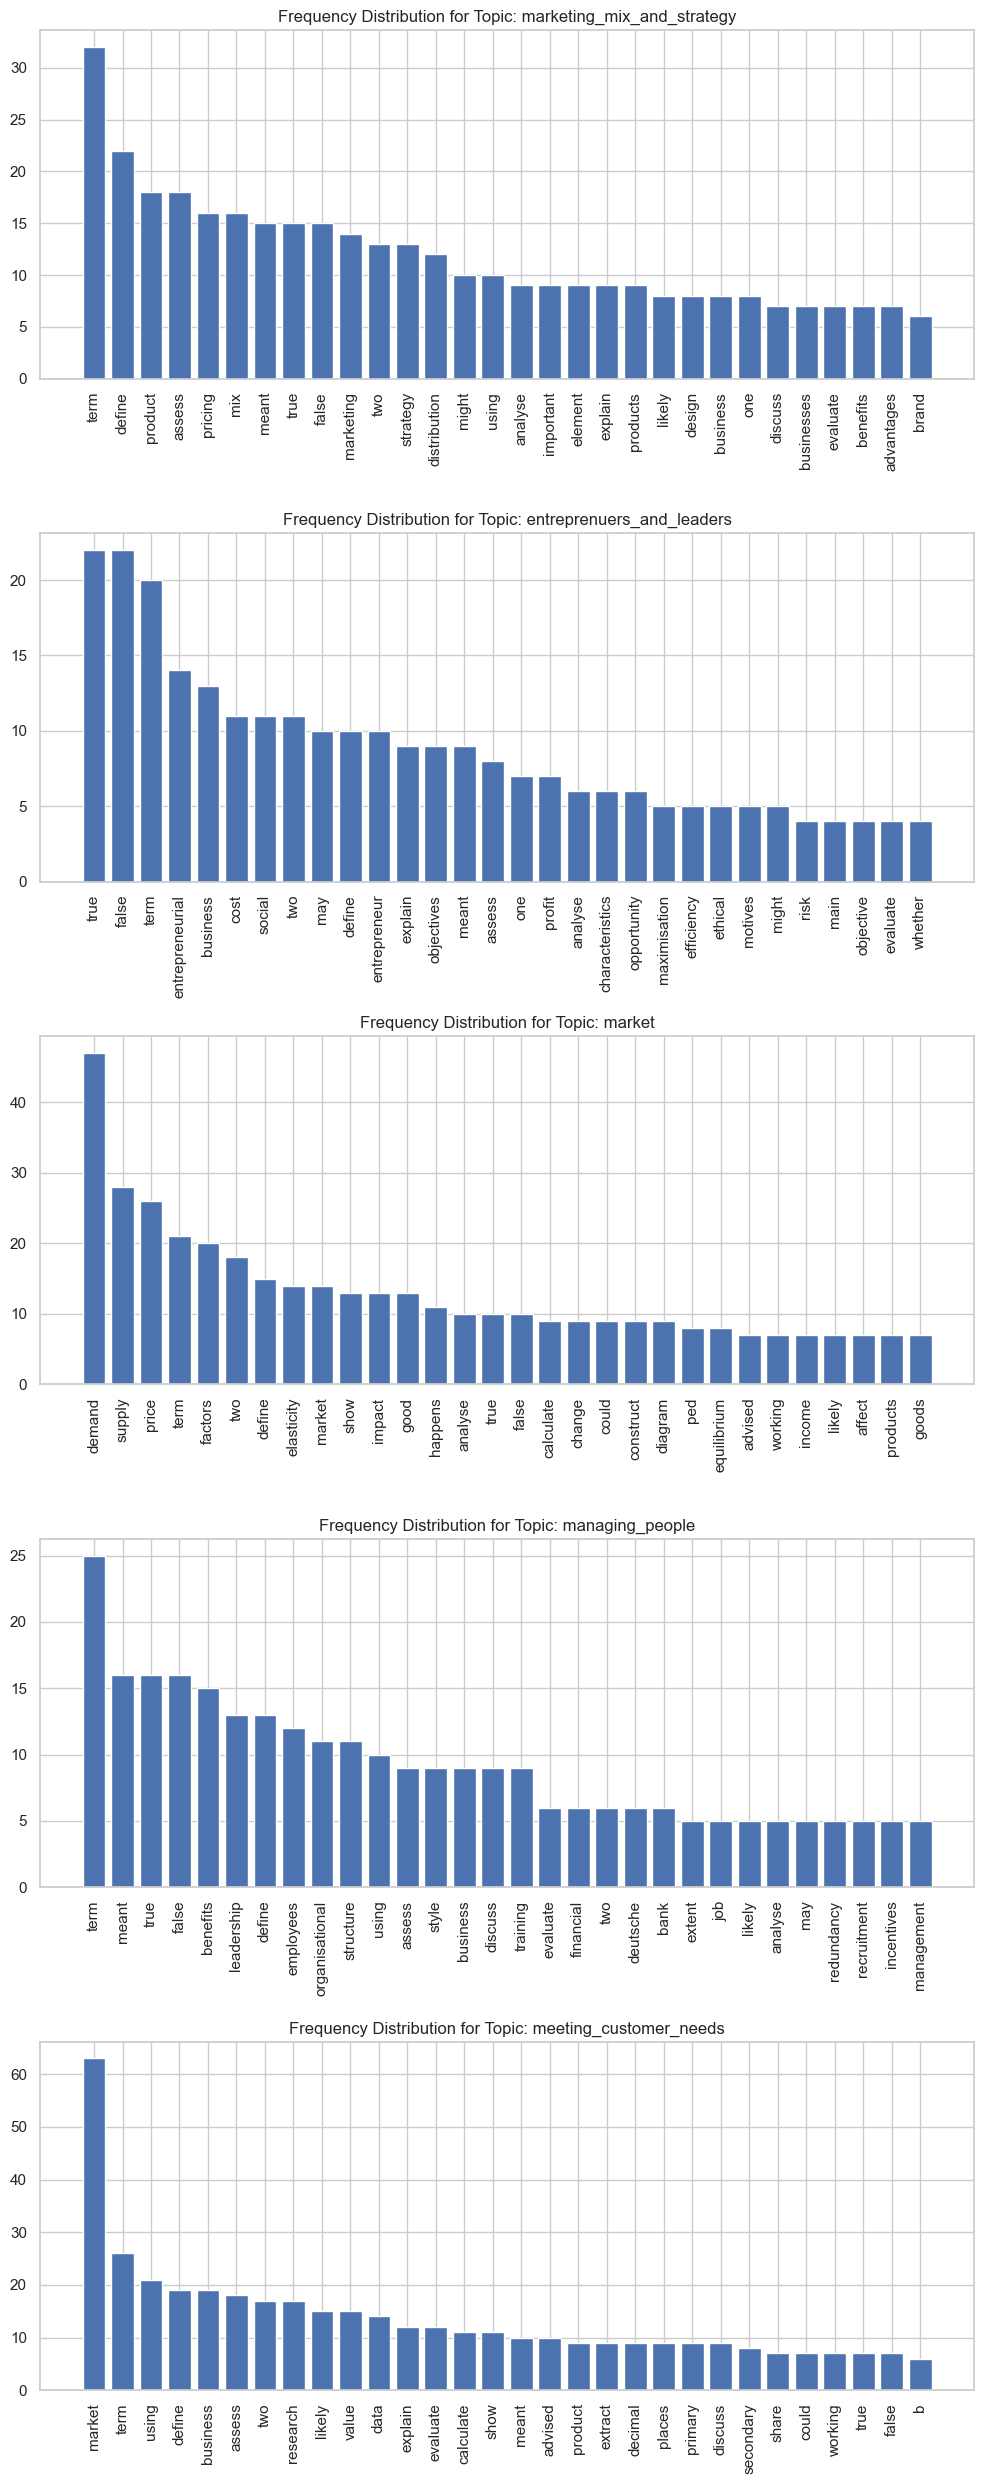

In [18]:
unique_topics = data['Topic'].unique()

fig, axes = plt.subplots(nrows=len(unique_topics), ncols=1, figsize=(10, 5 * len(unique_topics)))

for i, topic in enumerate(unique_topics):
    topic_data = data[data['Topic'] == topic]

    words = [word for text in topic_data['Cleaned_Questions'] for word in text.split()]
    fdist = FreqDist(words)
    
    if len(unique_topics) > 1:
        ax = axes[i]
    else:
        ax = axes

    words, frequencies = zip(*fdist.most_common(30))
    ax.bar(words, frequencies)
    ax.set_title(f'Frequency Distribution for Topic: {topic}')
    ax.tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()

Above, we see the Frequency Distribution for topics, which can help us tarck the most used words in each class. It shows that our claim is right, and indeed, certain words are more typical for specific classes than others.